In [1]:
#import dependencies
import requests
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

In [ ]:
# pip install plotly

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go

In [ ]:
#Sourse : api url:"https://api.openaq.org/v1/latest"

In [3]:

aqi_api_url = "https://api.openaq.org/v1/latest"

#url = "https://api.openaq.org/v1/countries"

In [4]:
#get api requests
response = requests.get(url)
print (response)


<Response [200]>


In [5]:
#assign json respose to a variable
response_json = response.json()
pprint.pprint(response_json)

{'meta': {'found': 8382,
          'license': 'CC BY 4.0',
          'limit': 100,
          'name': 'openaq-api',
          'page': 1,
          'website': 'https://docs.openaq.org/'},
 'results': [{'city': 'Ulaanbaatar',
              'coordinates': {'latitude': 47.932907, 'longitude': 106.92139},
              'country': 'MN',
              'location': '100 ail',
              'measurements': [{'lastUpdated': '2018-03-17T07:00:00.000Z',
                                'parameter': 'no2',
                                'sourceName': 'Agaar.mn',
                                'unit': 'µg/m³',
                                'value': 39},
                               {'lastUpdated': '2018-03-17T07:00:00.000Z',
                                'parameter': 'o3',
                                'sourceName': 'Agaar.mn',
                                'unit': 'µg/m³',
                                'value': 67},
                               {'lastUpdated': '2018-03-17T07:00:00.000Z

                                'unit': 'µg/m³',
                                'value': 56.5},
                               {'averagingPeriod': {'unit': 'hours',
                                                    'value': 1},
                                'lastUpdated': '2017-07-20T22:00:00.000Z',
                                'parameter': 'pm10',
                                'sourceName': 'EEA Belgium',
                                'unit': 'µg/m³',
                                'value': 14.7},
                               {'averagingPeriod': {'unit': 'hours',
                                                    'value': 1},
                                'lastUpdated': '2017-07-20T22:00:00.000Z',
                                'parameter': 'pm25',
                                'sourceName': 'EEA Belgium',
                                'unit': 'µg/m³',
                                'value': 4.5},
                               {'averagingPeriod': {'unit': 'hou

                                'lastUpdated': '2017-07-20T22:00:00.000Z',
                                'parameter': 'no2',
                                'sourceName': 'EEA Belgium',
                                'unit': 'µg/m³',
                                'value': 34.5},
                               {'averagingPeriod': {'unit': 'hours',
                                                    'value': 1},
                                'lastUpdated': '2017-07-20T22:00:00.000Z',
                                'parameter': 'so2',
                                'sourceName': 'EEA Belgium',
                                'unit': 'µg/m³',
                                'value': 3.5}]},
             {'city': 'Flanders',
              'coordinates': {'latitude': 51.250107, 'longitude': 4.3421044},
              'country': 'BE',
              'location': '42R897 - ANTWERPEN',
              'measurements': [{'averagingPeriod': {'unit': 'hours',
                                   

             {'city': 'Wallonia',
              'coordinates': {'latitude': 50.62067, 'longitude': 5.5164046},
              'country': 'BE',
              'location': '43R223 - JEMEPPE',
              'measurements': [{'averagingPeriod': {'unit': 'hours',
                                                    'value': 1},
                                'lastUpdated': '2017-07-20T22:00:00.000Z',
                                'parameter': 'co',
                                'sourceName': 'EEA Belgium',
                                'unit': 'µg/m³',
                                'value': 12.5},
                               {'averagingPeriod': {'unit': 'hours',
                                                    'value': 1},
                                'lastUpdated': '2017-07-20T22:00:00.000Z',
                                'parameter': 'pm25',
                                'sourceName': 'EEA Belgium',
                                'unit': 'µg/m³',
                      

                                'value': 0.719},
                               {'averagingPeriod': {'unit': 'hours',
                                                    'value': 1},
                                'lastUpdated': '2017-07-20T22:00:00.000Z',
                                'parameter': 'co',
                                'sourceName': 'EEA Belgium',
                                'unit': 'µg/m³',
                                'value': 10.5}]},
             {'city': 'Omaha-Council Bluffs',
              'coordinates': {'latitude': 41.257317, 'longitude': -95.98383},
              'country': 'US',
              'location': '46th and Farnam',
              'measurements': [{'averagingPeriod': {'unit': 'hours',
                                                    'value': 1},
                                'lastUpdated': '2018-03-17T04:00:00.000Z',
                                'parameter': 'pm10',
                                'sourceName': 'AirNow',
             

In [6]:
#check the measurements length from json response
i=2
len(response_json['results'][i]["measurements"])

1

In [7]:
#create a list to append output values from responses
airquality_data=[]
# Loop through the list of cities,countries and perform a request for data on each
for i in range(len(response_json['results'])):
    for j in range(len(response_json['results'][i]['measurements'])):
        d = {}
        d['param'] = response_json["results"][i]["measurements"][j]["parameter"]
        d['city'] = response_json['results'][i]['city']
        d['country'] = response_json['results'][i]['country']
        d['value'] = response_json["results"][i]["measurements"][j]["value"]
        d['unit'] = response_json["results"][i]["measurements"][j]["unit"]
        d['lastUpdated'] = response_json["results"][i]["measurements"][j]["lastUpdated"]
        airquality_data.append(d)

In [8]:
#convert airquality_data(list) to data frame 
airquality_params_df = pd.DataFrame(airquality_data)
airquality_params_df.head()

,city,country,lastUpdated,param,unit,value
0,Ulaanbaatar,MN,2018-03-17T07:00:00.000Z,no2,µg/m³,39.0
1,Ulaanbaatar,MN,2018-03-17T07:00:00.000Z,o3,µg/m³,67.0
2,Ulaanbaatar,MN,2018-03-17T07:00:00.000Z,co,µg/m³,631.0
3,Ulaanbaatar,MN,2018-03-17T07:00:00.000Z,pm10,µg/m³,188.0
4,Ulaanbaatar,MN,2018-03-17T07:00:00.000Z,so2,µg/m³,1.0


In [9]:
test_df=airquality_params_df.drop(airquality_params_df.index[2])
test_df.head()

,city,country,lastUpdated,param,unit,value
0,Ulaanbaatar,MN,2018-03-17T07:00:00.000Z,no2,µg/m³,39.0
1,Ulaanbaatar,MN,2018-03-17T07:00:00.000Z,o3,µg/m³,67.0
3,Ulaanbaatar,MN,2018-03-17T07:00:00.000Z,pm10,µg/m³,188.0
4,Ulaanbaatar,MN,2018-03-17T07:00:00.000Z,so2,µg/m³,1.0
5,Omaha-Council Bluffs,US,2018-03-17T04:00:00.000Z,so2,ppm,0.0


In [ ]:
pm10 = test_df.loc[test_df['param']=='pm10'].groupby('city')
pm10.head()

In [14]:
test1 = test_df.iloc[:,[1,3,5]]
test2=test1.loc[test1['param']=='pm10']
test2.head(20)

,country,param,value
3,MN,pm10,188.00
9,CL,pm10,20.31
10,CL,pm10,67.73
17,BE,pm10,39.20
19,BE,pm10,16.20
23,BE,pm10,16.70
28,BE,pm10,17.70
32,BE,pm10,53.70
35,BE,pm10,15.20
38,BE,pm10,16.70


In [50]:
pm10_value_df = pd.DataFrame(test2)
pm10_value_df

,country,value
3,MN,188.000
9,CL,20.310
10,CL,67.730
17,BE,39.200
19,BE,16.200
23,BE,16.700
28,BE,17.700
32,BE,53.700
35,BE,15.200
38,BE,16.700


In [ ]:
o3 = test_df.loc[test_df['param']=='o3'].groupby('city')
o3.head()

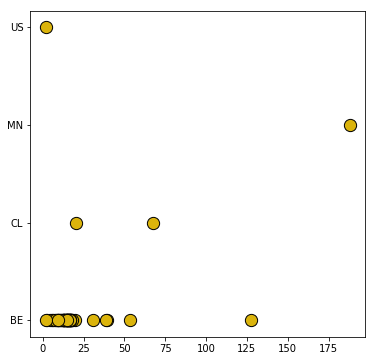

In [51]:
#labels = "MN","CL","BE","US"
#sizes = [15,75,55]
#explode = [0,0,0.1]
plt.figure(figsize=(6,6))
colors= ['xkcd:sky blue','lightcoral','gold']
#country_pm10 =xy.plot(kind="pie",labels = labels,figsize=(9,9),colors=colors,
                                             #shadow=True,startangle=90,explode=explode,autopct='%1.1f%%')
#plt.scatter(x=xy['value'],y= xy['country'],colors=colors,
                                            # shadow=True,startangle=90,autopct='%1.1f%%')

plt.scatter(pm10_value_df['value'],pm10_value_df['country'], s=150,edgecolor="black",color='xkcd:gold',label="urban",linewidth=1.0,alpha=1.0)
#country_pm10.set_title("country pm value")
#country_pm10.set_xlabel("PMvalue")
#country_pm10.set_ylabel("country")
plt.show()

In [61]:

#aqi_value = go.Scatter(x = xy['value'],y = xy['country'], name = "Income",mode = 'markers')
#line=go.Line(color='rgb(231,107,243)')
layout = go.Layout(plot_bgcolor='rgb(229,229,229)',
                   title = 'AQI By Countries',
              xaxis = dict(title = 'AQI Value'),
              yaxis = dict(title = 'Country Code'))
trace6 = go.Scatter(
    x=pm10_value_df['value'],
    y=pm10_value_df['country'],
    
    mode='markers',
    name='Ideal',
)
#data =go.Data([trace6])
#IncomeErr = go.Scatter(x = state_col,y = income_err_col,name = "IncomeErr", mode = 'lines+markers')
#value_plot= go.Scatter(x = state_col, y = value_col, name = "AirIndexValue", mode ="markers")
data = [trace6]
fig = go.Figure(data=data ,layout=layout)
py.iplot(fig)